# Introducción al Procesamiento de Imagen

## Instalo librerías que pretendo usar

In [1]:
!pip install scikit-image watermark -q

# Install OpenCV package first
!pip install opencv-python -q

# First install the required system library
!apt-get update && apt-get install -y libgl1-mesa-glx

!pip install opencv-python


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Hit:1 http://deb.debian.org/debian bullseye InRelease
Hit:2 http://deb.debian.org/debian-security bullseye-security InRelease
Hit:3 http://deb.debian.org/debian bullseye-updates InRelease




libgl1-mesa-glx is already the newest version (20.3.5-1).
0 upgraded, 0 newly installed, 0 to remove and 51 not upgraded.

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import numpy as np
import cv2
from cv2 import imread
import matplotlib.pyplot as plt

## Orígenes del Procesamiento de Imágenes

El procesamiento de imágenes es un campo interdisciplinario que combina elementos de la informática, la matemática, la física y la ingeniería, y que ha evolucionado de manera significativa desde mediados del siglo XX. Su desarrollo está estrechamente ligado al avance de la computación y a la necesidad de analizar visualmente grandes volúmenes de datos provenientes de diversas fuentes, como la medicina, la exploración espacial y la vigilancia.

Aunque el concepto de analizar imágenes no es nuevo —existen antecedentes mecánicos y ópticos desde principios del siglo XX—, fue recién en la década de 1950 cuando comenzaron a desarrollarse los primeros sistemas de procesamiento digital de imágenes, aprovechando la capacidad emergente de las computadoras electrónicas. Uno de los primeros hitos se produjo en el ámbito aeroespacial, cuando científicos del Jet Propulsion Laboratory (JPL) comenzaron a procesar imágenes enviadas por sondas espaciales, con el objetivo de mejorar su calidad visual y extraer información relevante para la investigación planetaria.

Durante las décadas de 1960 y 1970, el procesamiento de imágenes digitales se consolidó como una disciplina en sí misma. En este período se desarrollaron los primeros algoritmos para la mejora del contraste, la reducción de ruido, la detección de bordes y la segmentación de imágenes. Estos avances permitieron que la técnica se aplicara en diversos campos, entre ellos la medicina, donde comenzó a utilizarse para mejorar la interpretación de radiografías y tomografías; la astronomía, con el análisis detallado de imágenes del espacio; y la industria, mediante el reconocimiento automatizado de caracteres (OCR) y otras formas de análisis visual.

A partir de la década de 1980, el procesamiento de imágenes comenzó a integrarse con la inteligencia artificial, especialmente a través de los primeros modelos de redes neuronales y algoritmos de visión por computadora. Estas herramientas permitieron desarrollar sistemas más complejos, capaces de realizar tareas como el reconocimiento facial, la detección de movimiento y el seguimiento de objetos. El aumento de la capacidad computacional durante los años 1990 favoreció aún más el tratamiento de imágenes en color y en video, facilitando su aplicación en entornos más dinámicos y exigentes.

La expansión de dispositivos digitales, como cámaras digitales y teléfonos inteligentes, junto con el crecimiento exponencial de los datos visuales disponibles en la web, impulsaron una nueva etapa del procesamiento de imágenes a partir del año 2000. En la última década, el campo ha sido profundamente transformado por el desarrollo del aprendizaje profundo, en particular por el uso de redes neuronales convolucionales (CNN). Estas tecnologías han mejorado significativamente el rendimiento de las tareas de clasificación, segmentación y generación de imágenes, y han dado lugar a nuevas aplicaciones en medicina, automóviles autónomos, seguridad, industria creativa y otras áreas emergentes.

En este contexto, resulta pertinente no solo repasar la evolución histórica de esta disciplina, sino también analizar en profundidad sus aplicaciones actuales y su proyección futura, particularmente en relación con el desarrollo de soluciones basadas en inteligencia artificial.

## Línea del tiempo: Evolución del Procesamiento de Imágenes


📍 Inicios del siglo XX (1920-1930)
Análisis visual mecánico y óptico
Se desarrollan dispositivos rudimentarios para reconocimiento de formas. Primeros antecedentes del análisis automatizado de imágenes, aunque aún sin intervención digital.

📍 Década de 1950
Nacimiento del procesamiento digital de imágenes
Con el surgimiento de las primeras computadoras electrónicas, se desarrollan métodos para mejorar imágenes obtenidas por sondas espaciales. El Jet Propulsion Laboratory (JPL) lidera estas aplicaciones en el ámbito aeroespacial.

📍 Décadas de 1960 y 1970
Formalización del campo
Se crean algoritmos fundamentales: mejora de contraste, reducción de ruido, detección de bordes y segmentación. Aplicaciones tempranas en medicina, astronomía e industria (OCR).

📍 Décadas de 1980 y 1990
Integración con inteligencia artificial
Emergen técnicas de visión por computadora y redes neuronales simples. Se aplican al reconocimiento facial, seguimiento de objetos y análisis de video. Mayor capacidad computacional permite trabajar con imágenes a color y video en tiempo real.

📍 Años 2000
Expansión digital
El auge de las cámaras digitales y los smartphones dispara la generación de imágenes. Se popularizan las aplicaciones comerciales, médicas e industriales.

📍 Desde 2010 hasta la actualidad
Revolución del aprendizaje profundo
Las redes neuronales convolucionales (CNN) mejoran drásticamente tareas como clasificación, segmentación y generación de imágenes. Aplicaciones en vehículos autónomos, diagnóstico médico, vigilancia, arte digital, entre otras.

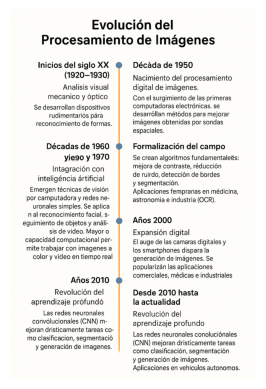

In [3]:
imagen_bgr = cv2.imread('línea del tiempo.png')
imagen_rgb = cv2.cvtColor(imagen_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(imagen_rgb)
plt.axis('off')
plt.show()

## Origen y desarrollo del concepto de "caja oscura"

El término "caja oscura" (del inglés black box) se origina en el ámbito de la cibernética y la ingeniería de sistemas durante la primera mitad del siglo XX. Su uso temprano está vinculado a la descripción de sistemas cuyo funcionamiento interno es desconocido o irrelevante para el análisis, pero que pueden ser comprendidos y manipulados a partir de sus entradas y salidas.

Uno de los pioneros en este enfoque fue Norbert Wiener, fundador de la cibernética, quien en la década de 1940 propuso estudiar sistemas complejos —biológicos, mecánicos o electrónicos— observando únicamente cómo responden a ciertos estímulos, sin necesidad de entender sus mecanismos internos. Este método era útil para modelar fenómenos de alta complejidad con escasa información disponible, y sentó las bases para enfoques posteriores en inteligencia artificial y teoría de sistemas.

El concepto fue luego retomado por David Black, ingeniero británico, y por diversos investigadores en control automático y teoría de la comunicación, como Claude Shannon, que desarrolló modelos de transmisión de información basados en flujos de entrada y salida, sin atender a la estructura interna de los dispositivos.

En el ámbito de la psicología conductista, la idea de la caja oscura también se utilizó para describir el funcionamiento de la mente humana: se estudiaba el comportamiento (salida) en función de estímulos (entrada), sin adentrarse en los procesos mentales internos, considerados inaccesibles o irrelevantes desde una perspectiva empírica.

Con el desarrollo de la inteligencia artificial, especialmente a partir del uso de redes neuronales profundas, el concepto de caja oscura adquirió una nueva dimensión. Las arquitecturas complejas de aprendizaje profundo ofrecen resultados altamente precisos, pero su proceso interno de decisión es difícil de interpretar, incluso para los propios desarrolladores. Esta "opacidad" ha generado debates éticos y metodológicos sobre la transparencia, la explicabilidad (explainability) y la confianza en los sistemas automatizados.

En la actualidad, el término se utiliza de forma crítica para señalar modelos o algoritmos que ofrecen resultados sin brindar claridad sobre cómo se llegó a ellos. Esta preocupación ha dado lugar a un área específica de estudio conocida como "explicabilidad de la inteligencia artificial" (Explainable AI, XAI), cuyo objetivo es diseñar modelos que sean tanto precisos como comprensibles para los humanos.

## La caja oscura en el procesamiento de imágenes

En el procesamiento clásico de imágenes (décadas de 1960 a 1990), los algoritmos eran en gran parte determinísticos y explicables: por ejemplo, una mejora de contraste o un filtro de detección de bordes seguía una lógica matemática definida, comprensible y trazable. Los investigadores sabían exactamente cómo cada paso afectaba la imagen, lo cual facilitaba el control y la interpretación de los resultados.

Con la irrupción del aprendizaje profundo a partir de la década de 2010, especialmente con el uso de redes neuronales convolucionales (CNN), el procesamiento de imágenes entró de lleno en la lógica de la caja oscura. En estos modelos, el sistema es entrenado con millones de imágenes, y aprende por sí mismo a extraer características y tomar decisiones, sin intervención humana directa en la formulación de reglas.

Por ejemplo, una CNN entrenada para reconocer tumores en imágenes médicas puede tener una precisión superior a la del ojo humano, pero no necesariamente puede explicar qué parte de la imagen motivó su decisión ni cómo llegó a ella. Esa falta de interpretabilidad convierte al modelo en una caja oscura: confiamos en su salida, pero desconocemos los mecanismos internos que la generaron.

Esto plantea múltiples desafíos, especialmente cuando se trata de aplicaciones críticas:

- ¿Qué pasa si el modelo falla?

- ¿Podemos auditar su decisión?

- ¿Es ético aplicar un modelo cuya lógica interna no entendemos completamente?

En este contexto, surge el campo de Inteligencia Artificial Explicable (XAI), que busca abrir estas cajas oscuras, ya sea mediante visualizaciones de activaciones neuronales, métodos de atribución como Grad-CAM (en imágenes) o la creación de modelos híbridos más interpretables.

## Importancia pedagógica de construir una caja oscura

En el ámbito educativo, la construcción de una caja oscura constituye una herramienta pedagógica poderosa para introducir y explorar conceptos complejos vinculados a la ciencia, la tecnología y la inteligencia artificial. Este tipo de dispositivo, que simula un sistema cuya lógica interna es inaccesible para el observador, permite evidenciar de manera tangible una tensión central en muchos procesos automatizados contemporáneos: la distancia entre el funcionamiento interno de un sistema y la interpretación externa de sus resultados.

A través de la experiencia de interactuar con una caja oscura, el aprendizaje se vuelve activo, exploratorio y reflexivo. Se propone al estudiante asumir el rol de analista o investigador, enfrentado al desafío de inferir el comportamiento de un sistema a partir de sus entradas y salidas, sin acceso al mecanismo interno que las conecta. Esta situación, que remite directamente al enfoque conductista de la psicología clásica y a los principios de la cibernética de mediados del siglo XX, resulta especialmente pertinente en el contexto actual de la inteligencia artificial y el aprendizaje automático, donde muchos modelos —como las redes neuronales profundas— funcionan como verdaderas “cajas negras” algorítmicas: altamente eficientes, pero difícilmente interpretables.

Desde una perspectiva didáctica, construir y trabajar con una caja oscura permite:

- Promover el pensamiento crítico y la formulación de hipótesis.

- Desarrollar habilidades de observación, inferencia y validación empírica.

- Reflexionar sobre los límites del conocimiento y la transparencia en los sistemas tecnológicos.

- Introducir debates éticos vinculados a la confianza y la explicabilidad en la toma de decisiones automatizadas.

En definitiva, se trata de un recurso que trasciende la dimensión técnica para habilitar una mirada crítica y contextualizada sobre las tecnologías emergentes. La caja oscura, lejos de ser solo un objeto, se convierte así en una metáfora activa que interpela las formas en que comprendemos, usamos y confiamos en los sistemas inteligentes que modelan nuestra vida cotidiana.

### Lista de materiales para construir una caja oscura óptica

Materiales básicos (estructura):

* 1 caja de cartón o madera completamente cerrada (puede ser una caja de zapatos, por ejemplo)
* 1 lupa o lente convergente (de 3 a 5 cm de diámetro)
* 1 hoja de papel vegetal, manteca o calco (para la pantalla de proyección)
* Pintura negra mate o cinta negra (para oscurecer el interior)
* Cúter, tijera, lápiz y regla
* Cinta adhesiva, pegamento o silicona calienteRegla y lápiz

## Paso a paso para construir tu caja oscura

1. Preparar la caja
Asegurate de que la caja no deje pasar luz por ningún lado excepto por donde va la lente.

Pintá el interior con pintura negra o forralo con cartulina negra. Esto mejora el contraste y evita reflejos.

2. Hacer el orificio para la lupa
En uno de los lados más cortos de la caja, marcá un círculo del tamaño de la lupa y recortalo con cuidado.

Insertá la lupa desde afuera, fijándola con cinta o silicona caliente para que quede bien sellada y firme.

Verificá que no se filtre luz alrededor de la lupa.

3. Crear la pantalla de proyección
En el lado opuesto a la lupa (el más lejano posible), cortá una ventana y colocá la hoja de papel vegetal/manteca.

Esta hoja funcionará como pantalla translúcida, donde se proyectará la imagen invertida.

También podés colocar una hoja blanca dentro del fondo de la caja, si vas a mirar desde una abertura por atrás en lugar de proyectar.

4. Asegurar la oscuridad
Cerrá bien la caja y sellá cualquier abertura o rendija con cinta negra.

Si vas a mirar desde algún orificio, hacelo por un tubo o una cortina negra, para que no entre luz externa.

5. Enfocar y probar
Apuntá la lupa hacia una fuente de luz natural o una escena exterior (ideal hacerlo al aire libre o frente a una ventana).

Mové la pantalla o variá la distancia hasta que la imagen se vea nítida e invertida (arriba-abajo, izquierda-derecha).

¡Listo! Ya tenés una cámara oscura funcional.

## Lectura de imagenes

In [173]:
box1 = imread('si1.jpg')
boxA = cv2.cvtColor(box1, cv2.COLOR_BGR2RGB)
box2 = imread('si2.jpg')
boxB = cv2.cvtColor(box2, cv2.COLOR_BGR2RGB)
vis1 = imread('si obj1.jpg')
visA = cv2.cvtColor(vis1, cv2.COLOR_BGR2RGB)
obj1 = imread('si obj1 2.jpg')
objA = cv2.cvtColor(obj1, cv2.COLOR_BGR2RGB)
vis2 = imread('si obj2.jpg')
visB = cv2.cvtColor(vis2, cv2.COLOR_BGR2RGB)
obj2 = imread('si obj2 1.jpg')
objB = cv2.cvtColor(obj2, cv2.COLOR_BGR2RGB)


## Desarrollo de la caja negra óptica

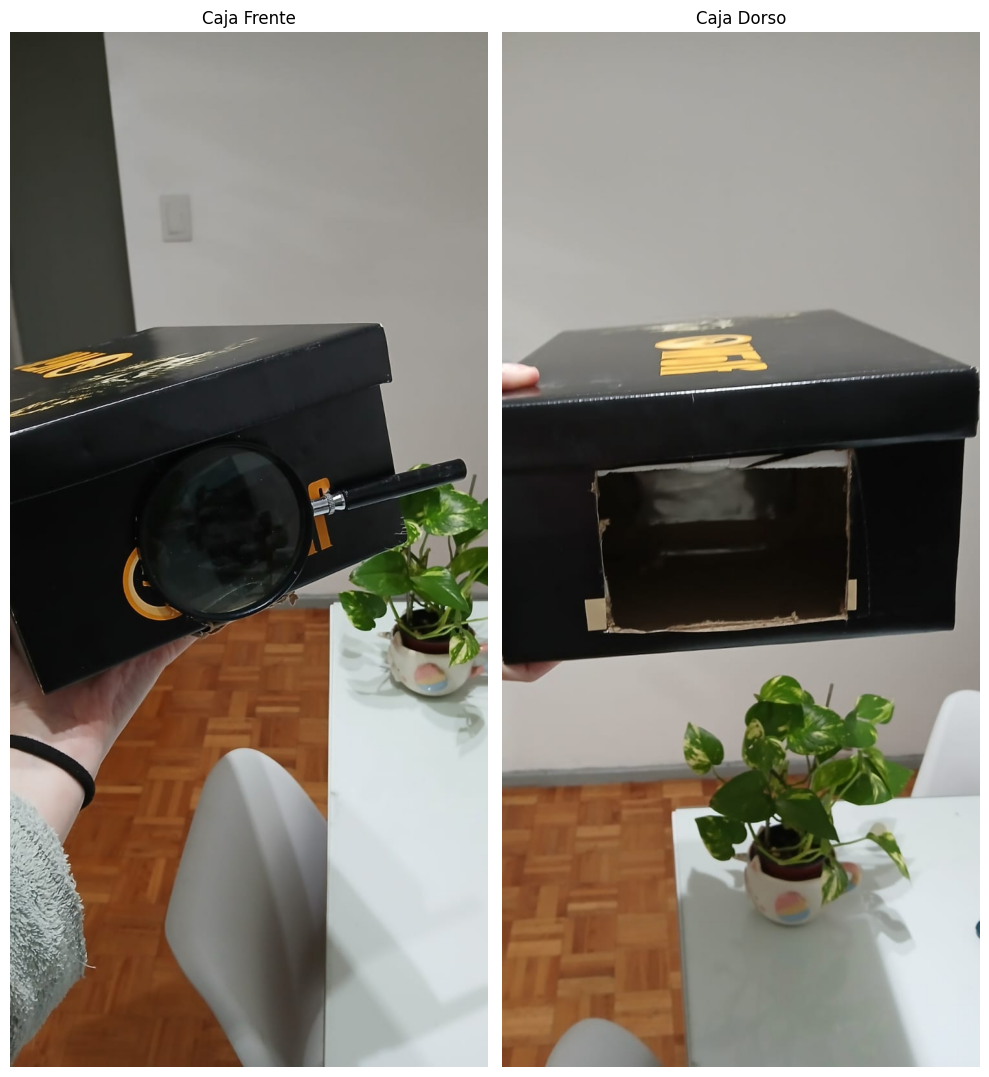

In [212]:
plt.figure(figsize=(10,20))  

plt.subplot(1, 2, 1)
plt.imshow(boxA)
plt.title(f'Caja Frente')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(boxB)
plt.title(f'Caja Dorso')
plt.axis("off")

plt.tight_layout()
plt.show()

## Primera Observación

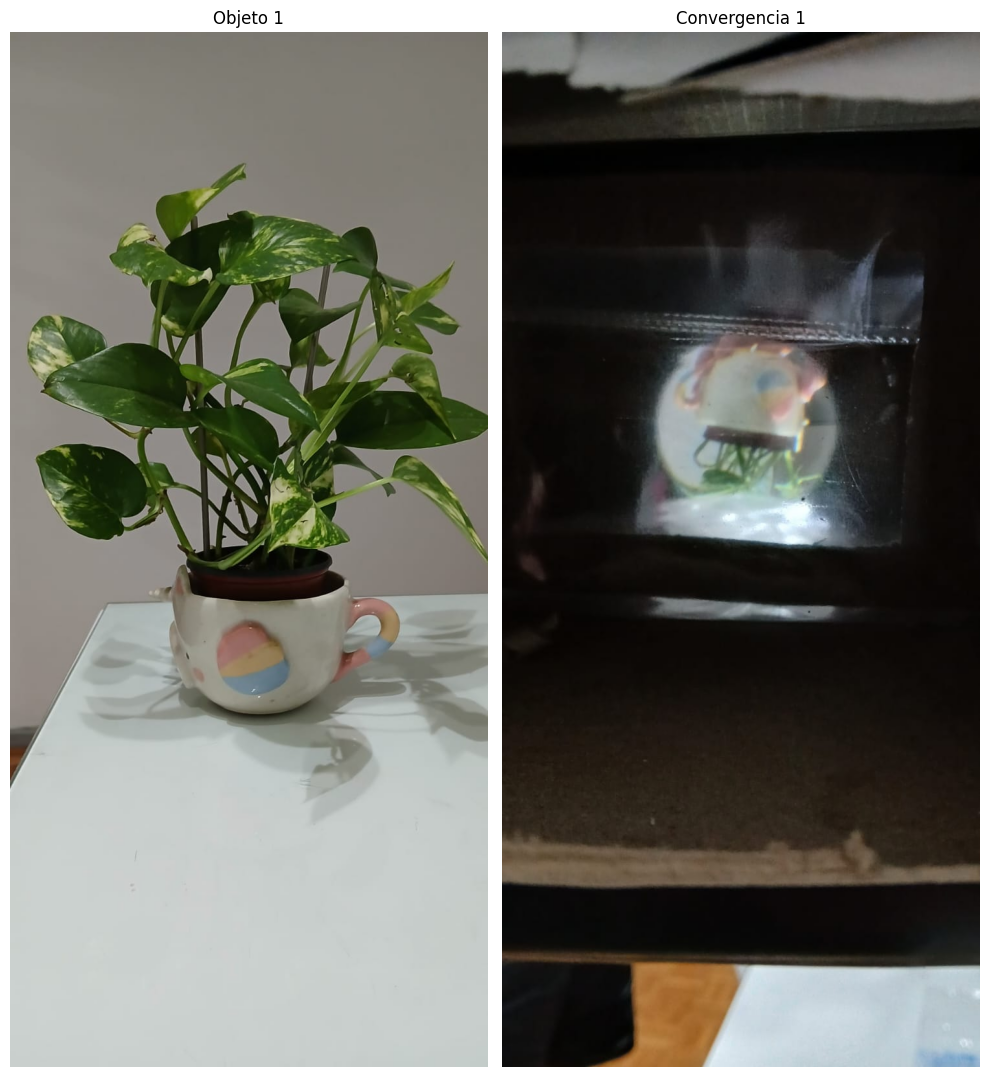

In [215]:
plt.figure(figsize=(10,20))  

plt.subplot(1, 2, 1)
plt.imshow(visA)
plt.title(f'Objeto 1')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(objA)
plt.title(f'Convergencia 1')
plt.axis("off")

plt.tight_layout()
plt.show()



## Segunda Observación

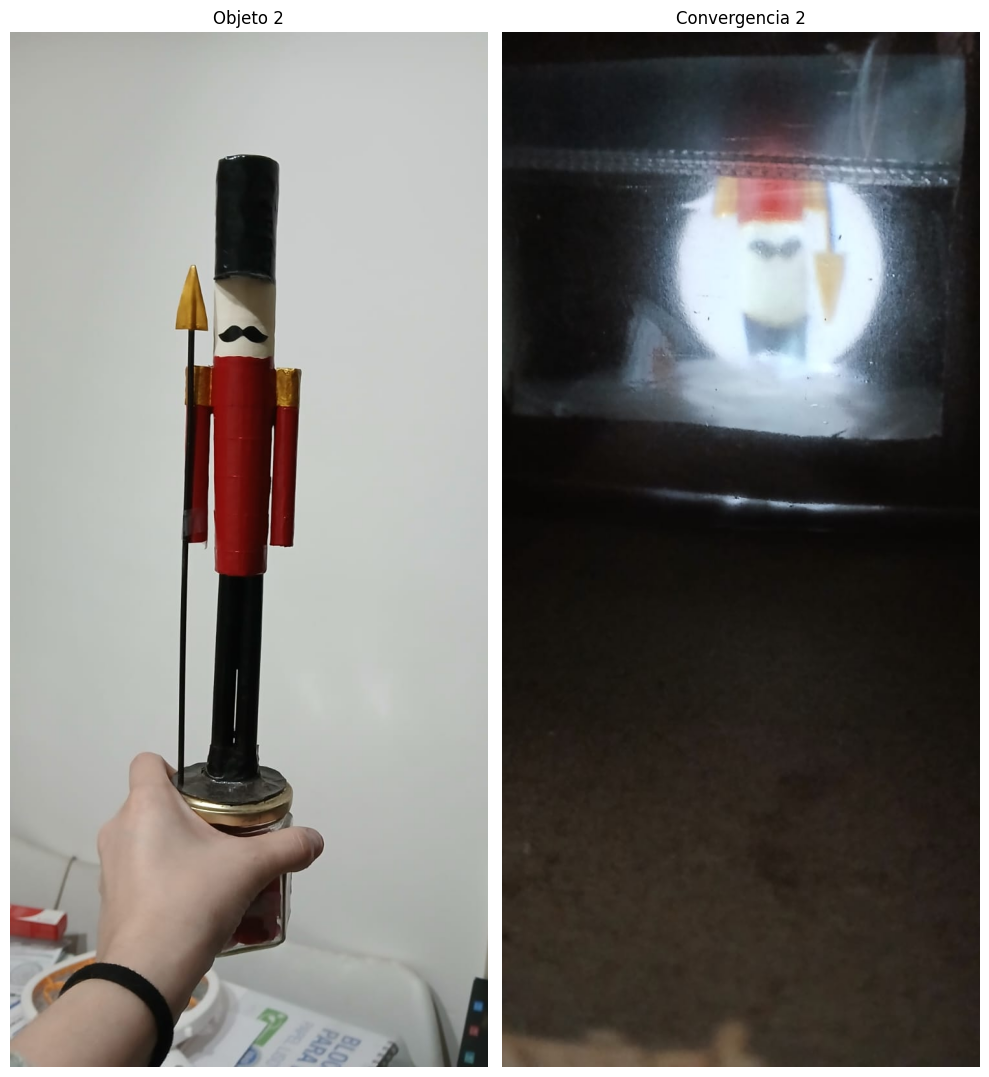

In [218]:
plt.figure(figsize=(10,20)) 

plt.subplot(1, 2, 1)
plt.imshow(visB)
plt.title(f'Objeto 2')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(objB)
plt.title(f'Convergencia 2')
plt.axis("off")

plt.tight_layout()
plt.show()


## ¿Qué se evidencia con este dispositivo?

* El fenómeno óptico de la formación de imágenes: cómo la luz transporta información visual.
* El principio del enfoque: cómo la lente organiza los rayos de luz.
* La idea de la percepción mediada: como metáfora para el procesamiento de imágenes y la IA.
* La imagen está "dada", pero no comprendida: como sucede en los modelos de IA tipo caja negra.

# Teoría del Movimiento en la Imagen

La teoría del movimiento en la imagen constituye un campo de estudio interdisciplinario que aborda las distintas formas en que el movimiento puede ser representado, percibido o interpretado dentro de un soporte visual, ya sea estático o dinámico. Esta teoría se articula en la intersección entre la estética, la percepción visual, la tecnología y la semiótica, y presenta aplicaciones tanto en el arte y el cine como en la informática, la psicología cognitiva y la inteligencia artificial.

Desde una perspectiva histórica y artística, el tratamiento del movimiento en las imágenes ha sido una preocupación central desde las vanguardias del siglo XX, particularmente en corrientes como el futurismo, que buscaban representar la velocidad y el dinamismo de la vida moderna. En este contexto, el movimiento se insinúa a través de técnicas compositivas como la repetición de formas, el uso de líneas diagonales y la superposición de planos.

En el cine y la animación, el movimiento no es simplemente representado, sino que se construye mediante una secuencia de imágenes fijas proyectadas a una velocidad tal que el ojo humano percibe continuidad. Este fenómeno se sustenta en mecanismos fisiológicos y cognitivos como la persistencia retiniana y el efecto phi, que permiten que el cerebro “complete” el movimiento entre imágenes sucesivas.

En el ámbito de la fotografía, el movimiento puede ser capturado de forma directa (por ejemplo, mediante técnicas de larga exposición) o sugerido a través de la composición, el encuadre y el uso del desenfoque direccional (motion blur), recursos que permiten transmitir una sensación de dinamismo en una imagen estática.

Por su parte, las ciencias cognitivas y la psicología de la percepción se ocupan de comprender cómo el cerebro interpreta y reconstruye el movimiento a partir de estímulos visuales. Estas investigaciones son fundamentales para el diseño de interfaces, simuladores, experiencias inmersivas y otros sistemas donde el movimiento en la imagen cumple un rol comunicativo o funcional.

Finalmente, en el campo de la visión por computadora y la inteligencia artificial, el análisis del movimiento en imágenes digitales —ya sea en tiempo real o a partir de grabaciones— constituye un área clave para el desarrollo de sistemas de vigilancia inteligente, vehículos autónomos y aplicaciones de análisis de comportamiento. Entre las técnicas más reIlevantes se encuentran la detección de movimiento, el flujo óptico (optical flow) y el seguimiento automático de objetos (object tracking), que permiten a las máquinas interpretar el desplazamiento espacial y temporal de elementos visuales.

## Importancia pedagógica

La alfabetización visual es una competencia clave en la formación de estudiantes de Ciencia de Datos e Inteligencia Artificial (IA), dado que gran parte de la interacción entre humanos y sistemas inteligentes se produce a través de representaciones visuales. En este marco, comprender el fenómeno de las imágenes en movimiento —ya sean videos, animaciones, secuencias visuales o visualizaciones dinámicas— es esencial no solo desde lo técnico, sino también desde una dimensión pedagógica integral.

1. Desarrollo de pensamiento visual y temporal
La imagen en movimiento introduce una variable temporal que desafía al estudiante a interpretar datos como procesos, no solo como estados estáticos. Esto estimula el pensamiento analítico en términos de cambio, secuencia, ritmo y evolución, competencias clave para abordar series temporales, simulaciones y procesos dinámicos en IA.

2. Comprensión crítica de las representaciones
El movimiento en la imagen no solo transmite información, sino que también tiene poder explicativo, narrativo y persuasivo. Enseñar a los estudiantes a leer críticamente las imágenes dinámicas —como visualizaciones interactivas, dashboards animados o flujos de datos en tiempo real— promueve una actitud reflexiva sobre cómo los datos se presentan y cómo pueden ser interpretados o manipulados.

3. Interfaz entre lo humano y lo automático
En muchos sistemas de IA, la interpretación de imágenes en movimiento es central: reconocimiento facial en video, análisis de tráfico, detección de anomalías, etc. Comprender cómo las máquinas procesan el movimiento permite a los estudiantes diseñar mejores modelos y también evaluar sus límites éticos y técnicos. Este conocimiento es clave para el desarrollo de aplicaciones responsables y centradas en el usuario.

4. Potenciación de la creatividad y la comunicación
El dominio del lenguaje visual en movimiento potencia las capacidades comunicacionales de los estudiantes, permitiéndoles contar historias con datos (data storytelling), construir presentaciones más efectivas y explorar narrativas interactivas. Esto resulta especialmente valioso en la formación de perfiles híbridos, donde el análisis de datos debe complementarse con habilidades comunicativas y creativas.

5. Formación en competencias transversales
Al estudiar el movimiento en la imagen, se vinculan conocimientos de disciplinas como la psicología cognitiva, la semiótica, el diseño gráfico, la programación y la ética, favoreciendo una formación integral e interdisciplinaria. Esto permite a los futuros profesionales actuar como puentes entre distintos sectores, con una mirada crítica sobre los efectos sociales de la IA y la visualización de datos.

## Secuencia de vuelo de pájaro

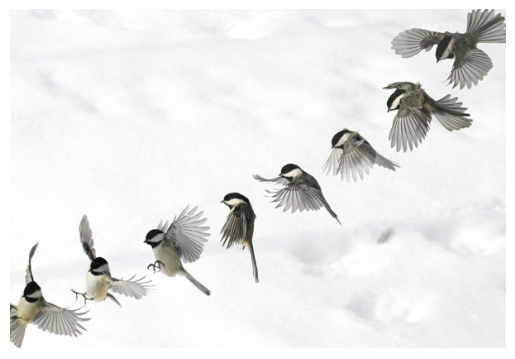

In [224]:
imagen_bgr = cv2.imread('R.jpeg')
imagen_rgb = cv2.cvtColor(imagen_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(imagen_rgb)
plt.axis('off')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9be9d3e5-4f25-48e6-912d-b59b8644d952' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>